#### Project Summary: 
The environmental factors below do not signiciantly influence estimates of deer density made from spotlight surveys.  Temperature was found to be the most influential predictor from a multiple linear regression model (MLR) and two machine learning models (random forest and gradient boosting).  The R2 of the selected linear model was poor (~ 0.10).  However, temperature was found to be a statistically significant predictor (p < 0.001).  The selected MLR found that for every 1 degree fahreheit increase in temperature, there was a 0.80 decrease in the deer density. Environmental factors: 

* month of the year (numerical)
* temperature (continuous variable)
* wind (binary)
* cloud cover (index)
* rain (binary)
* snow (binary)
* fog (binary)
* moon phase

#### Dataset: 

I found this dataset through google's public dataset search.  This is deer spotlight survey data collected by the Department of the Interior in Great Smoky Mountains National Park from 1993-2003.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xg

C:\Users\wpson\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
data = pd.read_csv("Observations.csv")
data

,date,start,finish,sunset,temperature,windy,clouds,rainy,snow,fog,...,Coyote,Opossum,Skunk,Wild_Hog,Red_Wolf,Gray_Fox,Rabbit,Bobcat,Area,deer_dens
0,1/25/1993,1/0/1900,1/0/1900,1/0/1900,36.0,False,1,False,False,False,...,0,0,0,0,5,2,1,0,470.0,4.519231
1,2/22/1993,1/0/1900,1/0/1900,1/0/1900,46.0,False,1,False,False,False,...,0,0,1,0,0,0,1,0,470.0,2.526882
2,3/8/1993,1/0/1900,1/0/1900,1/0/1900,56.5,False,3,False,False,False,...,0,0,6,0,0,1,4,0,470.0,1.690647
3,3/29/1993,1/0/1900,1/0/1900,NaN,64.0,False,1,False,False,False,...,0,0,6,0,0,1,2,0,470.0,1.991525
4,5/11/1993,1/0/1900,1/0/1900,1/0/1900,65.0,False,2,False,False,False,...,0,0,0,0,0,0,0,0,470.0,1.843137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,9/10/2003,1/0/1900,1/0/1900,1/0/1900,60.0,False,1,False,False,False,...,2,0,0,0,0,0,1,0,470.0,24.736842
213,9/27/2003,1/0/1900,1/0/1900,1/0/1900,62.0,False,0,True,False,False,...,1,0,0,0,0,1,0,0,470.0,7.966102
214,10/14/2003,1/0/1900,NaN,1/0/1900,56.0,True,3,False,False,False,...,7,0,0,0,0,0,0,0,470.0,3.983051
215,10/29/2003,1/0/1900,1/0/1900,1/0/1900,40.0,False,3,False,False,False,...,6,0,0,1,0,0,0,0,470.0,21.363636


In [3]:
data[["month","day","year"]] = data["date"].str.split("/",expand=True)

(-1.0, 50.0)

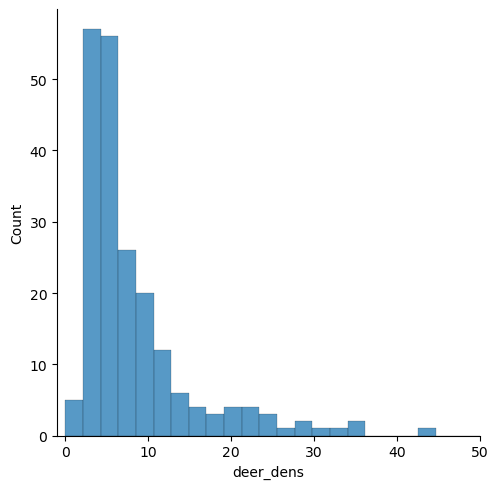

In [4]:
sns.displot(data['deer_dens']) # not normal, skewed left
plt.xlim(-1, 50)

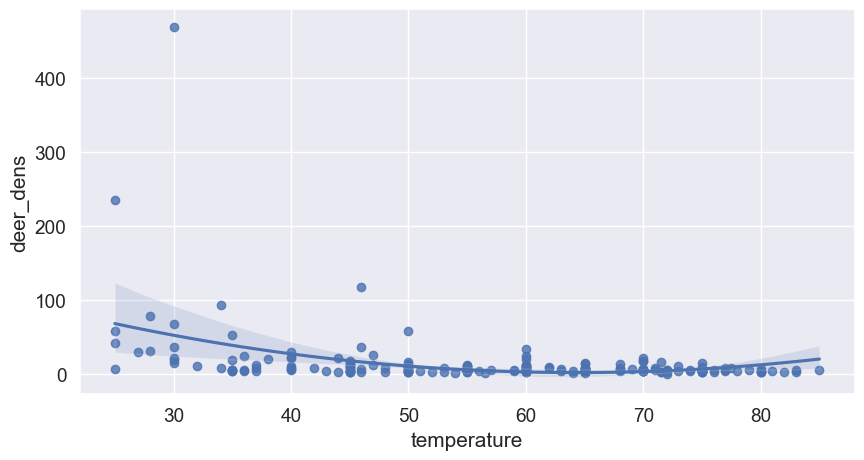

In [5]:
sns.set(rc={"figure.figsize":(10, 5)}, font_scale = 1.25) 
sns.regplot(x = 'temperature', y = 'deer_dens', data = data, order=2)
plt.title('', fontsize=20)
plt.show()

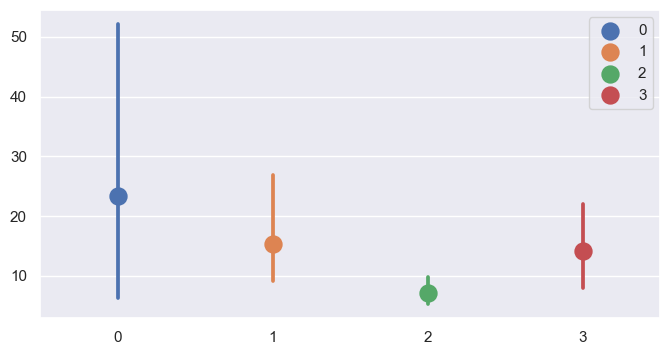

In [6]:
sns.set(rc={"figure.figsize":(8, 4)}, font_scale = 1) 
p = sns.pointplot(x="clouds", y="deer_dens", hue = "clouds", data=data, scale=1.5)
plt.xlabel("", size=30)
plt.ylabel("", size=30)
plt.legend(title = "", title_fontsize="30")

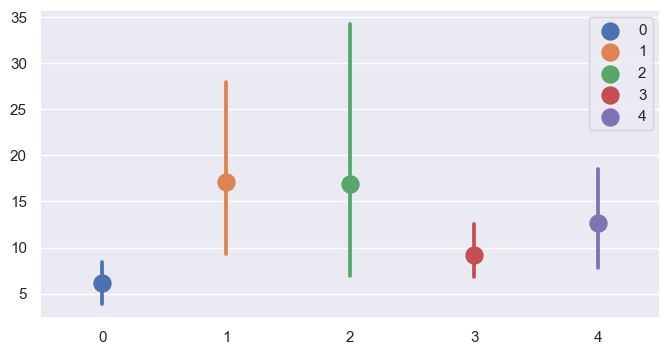

In [7]:
sns.set(rc={"figure.figsize":(8, 4)}, font_scale = 1) 
p = sns.pointplot(x="moon", y="deer_dens", hue = "moon", data=data, scale= 1.5)
plt.xlabel("", size=30)
plt.ylabel("", size=30)
plt.legend(title = "", title_fontsize="30")

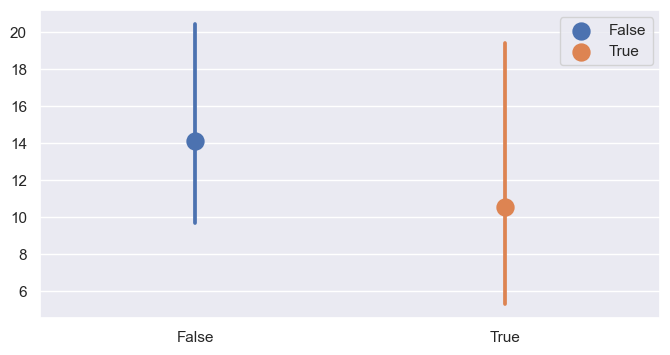

In [8]:
sns.set(rc={"figure.figsize":(8, 4)}, font_scale = 1) 
p = sns.pointplot(x="windy", y="deer_dens", hue = "windy", data=data, scale= 1.5)
plt.xlabel("", size=30)
plt.ylabel("", size=30)
plt.legend(title = "", title_fontsize="30")

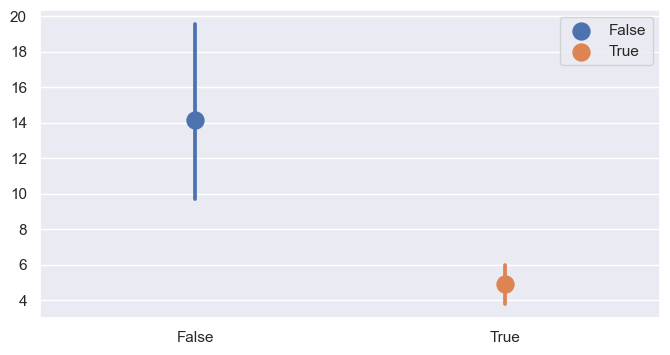

In [9]:
sns.set(rc={"figure.figsize":(8, 4)}, font_scale = 1) 
p = sns.pointplot(x="rainy", y="deer_dens", hue="rainy", data=data, scale= 1.5)
plt.xlabel("", size=30)
plt.ylabel("", size=30)
plt.legend(title = "", title_fontsize="30")

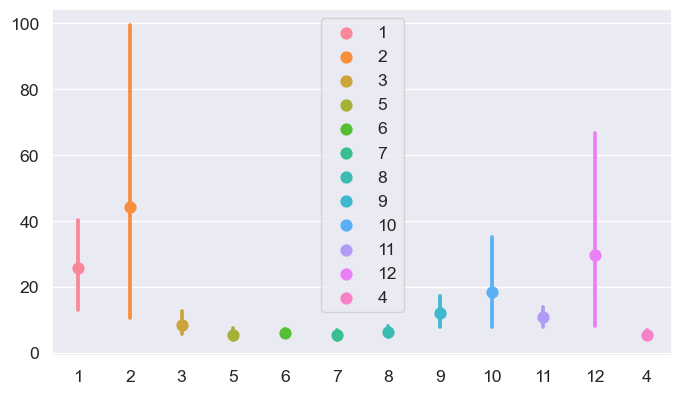

In [10]:
sns.set(rc={"figure.figsize":(8, 4.5)}, font_scale = 1.15) 
p = sns.pointplot(x="month", y="deer_dens", hue="month", data=data, scale= 1)
plt.xlabel("", size=30)
plt.ylabel("", size=30)
plt.legend(title = "", title_fontsize="30")

In [11]:
data['windy'].replace(['FALSE', 'TRUE'],[0, 1], inplace=True)
data['rainy'].replace(['FALSE', 'TRUE'],[0, 1], inplace=True)
data['snow'].replace(['FALSE', 'TRUE'],[0, 1], inplace=True)
data['fog'].replace(['FALSE', 'TRUE'],[0, 1], inplace=True)

In [12]:
data.drop(['date','start','finish','sunset','spotlight','notes',
           'conditions','observers','total_deer','Raccoon','Bear',
           'Coyote','Opossum','Skunk','Wild_Hog','Red_Wolf','Gray_Fox',
           'Rabbit','Bobcat','Area'],axis=1, inplace=True)

In [13]:
print("Total NaN in dataframe :" , data.isna().sum().sum())
print("Total NaN in each column of the dataframe")
na = []
for index, col in enumerate(data):
    na.append((index, data[col].isna().sum())) 
na_sorted = na.copy()
na_sorted.sort(key = lambda x: x[1], reverse = True) 

for i in range(len(data.columns)):
    print(data.columns[na_sorted[i][0]],":", na_sorted[i][1], "NaN")

Total NaN in dataframe : 0
Total NaN in each column of the dataframe
temperature : 0 NaN
windy : 0 NaN
clouds : 0 NaN
rainy : 0 NaN
snow : 0 NaN
fog : 0 NaN
moon : 0 NaN
deer_dens : 0 NaN
month : 0 NaN
day : 0 NaN
year : 0 NaN


C:\Users\wpson\AppData\Local\Temp\ipykernel_7392\3075842917.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, annot_kws={"size":12})


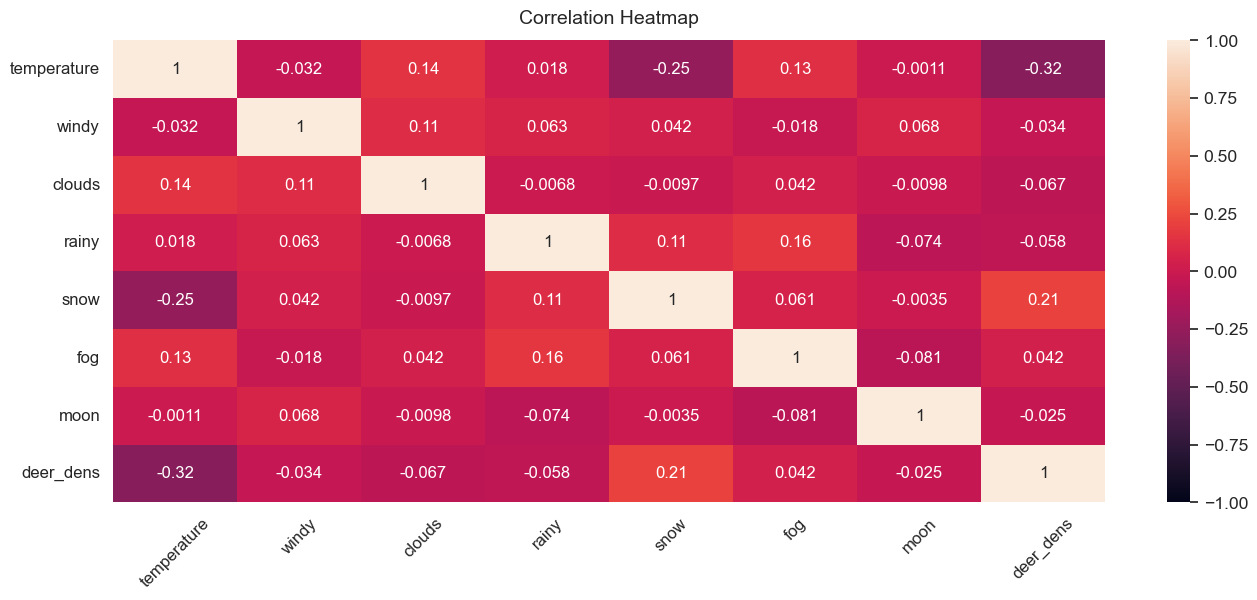

In [14]:
# Looking at correlations then dropping highly correlated variables
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, annot_kws={"size":12})
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);
plt.xticks(rotation = 45)
plt.tick_params(axis='x', which='major', labelsize=12)
plt.tick_params(axis='y', which='major', labelsize=12)
plt.show()

In [27]:
X = data[['month','temperature','windy','clouds','rainy','snow','fog','moon']] 
y = data['deer_dens']

Fit several linear regression models and select final model

In [28]:
lm1 = smf.ols(formula = 'deer_dens ~ month + temperature + windy + clouds + rainy + snow + fog + moon', data = data).fit()
lm2 = smf.ols(formula = 'deer_dens ~ month + temperature + windy + clouds + rainy + snow + fog', data = data).fit()
lm3 = smf.ols(formula = 'deer_dens ~ month + temperature + windy + clouds + rainy + snow', data = data).fit()
lm4 = smf.ols(formula = 'deer_dens ~ month + temperature + windy + clouds + rainy', data = data).fit()
lm5 = smf.ols(formula = 'deer_dens ~ month + temperature + windy + clouds', data = data).fit()
lm6 = smf.ols(formula = 'deer_dens ~ month + temperature + windy', data = data).fit()
lm7 = smf.ols(formula = 'deer_dens ~ month + temperature', data = data).fit()

lm8 = smf.ols(formula = 'deer_dens ~ month + windy + clouds + rainy + snow + fog + moon', data = data).fit()
lm9 = smf.ols(formula = 'deer_dens ~ month + clouds + rainy + snow + fog + moon', data = data).fit()
lm10 = smf.ols(formula = 'deer_dens ~ month + rainy + snow + fog + moon', data = data).fit()
lm11 = smf.ols(formula = 'deer_dens ~ month + snow + fog + moon', data = data).fit()
lm12 = smf.ols(formula = 'deer_dens ~ month + fog + moon', data = data).fit()
lm13 = smf.ols(formula = 'deer_dens ~ month + moon', data = data).fit()

lm14 = smf.ols(formula = 'deer_dens ~ month + temperature + clouds + rainy + snow + fog + moon', data = data).fit()
lm15 = smf.ols(formula = 'deer_dens ~ month + temperature + windy + rainy + snow + fog + moon', data = data).fit()
lm16 = smf.ols(formula = 'deer_dens ~ month + temperature + windy + clouds + snow + fog + moon', data = data).fit()
lm17 = smf.ols(formula = 'deer_dens ~ month + temperature + windy + clouds + rainy + fog + moon', data = data).fit()
lm18 = smf.ols(formula = 'deer_dens ~ month + temperature + windy + clouds + rainy + snow + moon', data = data).fit()

lm19 = smf.ols(formula = 'deer_dens ~ temperature', data = data).fit()


print("aic lm1: ", lm1.aic) 
print("aic lm2: ", lm2.aic)
print("aic lm3: ", lm3.aic) # lowest AIC score
print("aic lm4: ", lm4.aic)
print("aic lm5: ", lm5.aic)
print("aic lm6: ", lm6.aic)
print("aic lm7: ", lm7.aic) 
print("aic lm8: ", lm8.aic) 
print("aic lm9: ", lm9.aic)
print("aic lm10:", lm10.aic)
print("aic lm11:", lm11.aic)
print("aic lm12:", lm12.aic)
print("aic lm13:", lm13.aic)
print("aic lm14:", lm14.aic)
print("aic lm15:", lm15.aic)
print("aic lm16:", lm16.aic)
print("aic lm17:", lm17.aic)
print("aic lm18:", lm18.aic)
print("aic lm19:", lm19.aic)

aic lm1:  2177.3891875997715
aic lm2:  2175.4990471244955
aic lm3:  2174.4356348595493
aic lm4:  2178.7799989774767
aic lm5:  2177.3855611651675
aic lm6:  2176.1520626943893
aic lm7:  2174.5853269944837
aic lm8:  2186.995369118308
aic lm9:  2185.9728402825276
aic lm10: 2185.0799855161176
aic lm11: 2185.420821190907
aic lm12: 2191.7303998251728
aic lm13: 2191.4779686928855
aic lm14: 2175.7924002863865
aic lm15: 2176.150137449389
aic lm16: 2176.8923127026515
aic lm17: 2181.4552435424075
aic lm18: 2176.2662082704737
aic lm19: 2168.3095860468557


In [29]:
print("aic lm1: ", lm1.bic) 
print("aic lm2: ", lm2.bic)
print("aic lm3: ", lm3.bic)
print("aic lm4: ", lm4.bic)
print("aic lm5: ", lm5.bic)
print("aic lm6: ", lm6.bic)
print("aic lm7: ", lm7.bic) # lowest BIC score
print("aic lm8: ", lm8.bic) 
print("aic lm9: ", lm9.bic)
print("aic lm10:", lm10.bic)
print("aic lm11:", lm11.bic)
print("aic lm12:", lm12.bic)
print("aic lm13:", lm13.bic)
print("aic lm14:", lm14.bic)
print("aic lm15:", lm15.bic)
print("aic lm16:", lm16.bic)
print("aic lm17:", lm17.bic)
print("aic lm18:", lm18.bic)
print("aic lm19:", lm19.bic)

aic lm1:  2241.60723731704
aic lm2:  2236.3371994882236
aic lm3:  2231.893889869737
aic lm4:  2232.858356634124
aic lm5:  2228.0840214682744
aic lm6:  2223.470625643956
aic lm7:  2218.52399259051
aic lm8:  2247.8335214820363
aic lm9:  2243.4310952927153
aic lm10: 2239.158343172765
aic lm11: 2236.119281494014
aic lm12: 2239.0489627747393
aic lm13: 2235.4166342889116
aic lm14: 2236.6305526501146
aic lm15: 2236.9882898131173
aic lm16: 2237.7304650663796
aic lm17: 2242.2933959061356
aic lm18: 2237.104360634202
aic lm19: 2175.0693807539365


AIC and BIC reported lowest score for lm19, which only includes the predictor, 'temperature'

In [30]:
lm19.summary() # Poor fit to data

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              deer_dens   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     24.34
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           1.62e-06
Time:                        11:47:07   Log-Likelihood:                -1082.2
No. Observations:                 217   AIC:                             2168.
Df Residuals:                     215   BIC:                             2175.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      59.6391      9.645      6.183      0.000      40.628      78.650
temperature    -0.8032      0.163     -4.933      0.000      -1.124      -0.482
==============================================================================
Omnibus:                      385.819   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           104027.876
Skew:                           9.350   Prob(JB):                         0.00
Kurtosis:                     108.621   Cond. No.                         236.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
pred = lm19.predict(X)
print(pred)

0      30.723145
1      22.690931
2      14.257106
3       8.232946
4       7.429724
         ...    
212    11.445831
213     9.839388
214    14.658717
215    27.510260
216    35.542474
Length: 217, dtype: float64


In [32]:
mae = mean_absolute_error(y, pred)
print(mae)

13.093519852098817


In [33]:
rf = RandomForestRegressor(random_state = 1)
gb = GradientBoostingRegressor(random_state = 1)
xgbr = xg.XGBRegressor(random_state = 1)

KFold cross validation to assess overfit

In [34]:
scores_rf = cross_val_score(rf,X,y,scoring="neg_mean_absolute_error",cv=10)
mae_rf = (-scores_rf)
print("MAE values: ", mae_rf)
print("MAE average: ", np.mean(mae_rf))

MAE values:  [38.05041201  9.72828245 12.03956402  6.13457854  4.26940806  2.99232608
 19.16526236  6.93235216 18.6182916  25.29351003]
MAE average:  14.322398729171505


In [35]:
scores_gb = cross_val_score(gb,X,y,scoring="neg_mean_absolute_error",cv=10)
mae_gb = (-scores_gb)
print("MAE values: ", mae_gb)
print("MAE average: ", np.mean(mae_gb))

MAE values:  [37.96485012  8.5941504  10.61453546  7.54330526  7.90652676  2.93729842
 29.93939007  5.2208895  15.4124796  30.70625533]
MAE average:  15.683968090562553


In [36]:
scores_xgbr = cross_val_score(xgbr,X,y,scoring="neg_mean_absolute_error",cv=10)
mae_xgbr = (-scores_xgbr)
print("MAE values: ", mae_xgbr)
print("MAE average: ", np.mean(mae_xgbr))

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\wpson\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\wpson\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "C:\Users\wpson\anaconda3\lib\site-packages\xgboost\sklearn.py", line 761, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
  File "C:\Users\wpson\anaconda3\lib\site-packages\xgboost\sklearn.py", line 286, in _wrap_evaluation_matrices
    train_dmatrix = create_dmatrix(
  File "C:\Users\wpson\anaconda3\lib\site-packages\xgboost\sklearn.py", line 775, in <lambda>
    create_dmatrix=lambda **kwargs: DMatrix(nthread=self.n_jobs, **kwargs),
  File "C:\Users\wpson\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "C:\Users\wpson\anaconda3\lib\site-packages\xgboost\core.py", line 616, in __init__
    handle, feature_names, feature_types = dispatch_data_backend(
  File "C:\Users\wpson\anaconda3\lib\site-packages\xgboost\data.py", line 707, in dispatch_data_backend
    return _from_pandas_df(data, enable_categorical, missing, threads,
  File "C:\Users\wpson\anaconda3\lib\site-packages\xgboost\data.py", line 297, in _from_pandas_df
    data, feature_names, feature_types = _transform_pandas_df(
  File "C:\Users\wpson\anaconda3\lib\site-packages\xgboost\data.py", line 242, in _transform_pandas_df
    raise ValueError(msg + ', '.join(bad_fields))
ValueError: DataFrame.dtypes for data must be int, float, bool or category.  When
                categorical type is supplied, DMatrix parameter `enable_categorical` must
                be set to `True`.month


MAEs are all over the place and the xgbr model failed to fit. 

Tune hyperparamters via grid search 

In [37]:
params = [{'n_estimators':np.arange(5,100,5),
           'max_features':np.arange(0.1,1.0,0.05)}]

In [38]:
gs_rf = GridSearchCV(estimator = rf, 
                           param_grid = params,
                           cv=5, 
                           scoring="neg_mean_absolute_error",
                           verbose=1,
                           n_jobs=-1)

In [39]:
gs_gb = GridSearchCV(estimator = gb, 
                           param_grid = params,
                           cv=5, 
                           scoring="neg_mean_absolute_error",
                           verbose=1,
                           n_jobs=-1)

In [40]:
gs_xgbr = GridSearchCV(estimator = xgbr, 
                           param_grid = params,
                           cv=5, 
                           scoring="neg_mean_absolute_error",
                           verbose=1,
                           n_jobs=-1)

In [41]:
gs_rf.fit(X,y)

Fitting 5 folds for each of 342 candidates, totalling 1710 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid=[{'max_features': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                          'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95])}],
             scoring='neg_mean_absolute_error', verbose=1)

In [42]:
gs_gb.fit(X,y)

Fitting 5 folds for each of 342 candidates, totalling 1710 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=1),
             n_jobs=-1,
             param_grid=[{'max_features': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                          'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95])}],
             scoring='neg_mean_absolute_error', verbose=1)

In [45]:
pred_gs_rf = gs_rf.predict(X)
pred_gs_gb = gs_gb.predict(X)

mae_gs_rf = mean_absolute_error(y, pred_gs_rf)
mae_gs_gb = mean_absolute_error(y, pred_gs_gb)

print(mae_gs_rf) # lowest mae
print(mae_gs_gb)

4.888406862091703
8.907655714130767


Assess if predictors have similar feature importance scores among models

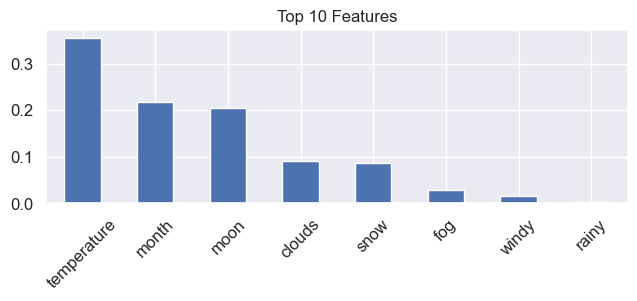

In [46]:
feat_importances = pd.Series(gs_rf.best_estimator_.feature_importances_, index=X.columns)
plt.figure(figsize=(7.5, 2.25))
feat_importances.nlargest(10).plot(kind='bar')
titlefont = 12
plt.title("Top 10 Features", fontdict={'fontsize':titlefont})
plt.xticks(rotation = 45) 
plt.tick_params(axis='x', which='major', labelsize=12)
plt.tick_params(axis='y', which='major', labelsize=12)
plt.show()

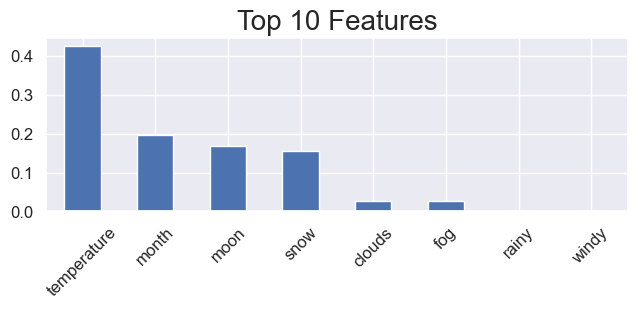

In [47]:
feat_importances = pd.Series(gs_gb.best_estimator_.feature_importances_, index=X.columns)
plt.figure(figsize=(7.5, 2.25))
feat_importances.nlargest(10).plot(kind='bar')
titlefont = 20
plt.title("Top 10 Features", fontdict={'fontsize':titlefont})
plt.xticks(rotation = 45)
plt.tick_params(axis='x', which='major', labelsize=12)
plt.tick_params(axis='y', which='major', labelsize=12)
plt.show()